In [3]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

In [4]:
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [5]:
cs = ["2018_03_21_slide_31","2018_03_21_slide_69"]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
ligands = ["LF","P132","P102","P125","Nenad","P084","P080"]
#spots_dj =  spots_dj.exclude(raw_spot__lig_fix_batch__ligand__sid__in=ligands)

In [6]:
reload(a2)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [7]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(20).clean()
frames = []
for n, d in data.spots_pd.groupby("Ligand Batch"):
    
    tukey = pairwise_tukeyhsd(endog=d["Intensity"], groups=d["Analyte Batch"],alpha=0.01)
    frames.append(pd.Series({"Ligand Batch":n,"Distinct Groups":np.count_nonzero(tukey.reject)}))
pepsig = pd.concat(frames, axis=1).transpose().sort_values(by="Distinct Groups", ascending=False)
lb = pd.Series(pepsig["Distinct Groups"].values,index=pepsig["Ligand Batch"])  
#lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

In [22]:
lb.index.get_loc("P135")

69

In [23]:
lb[69]

32

In [411]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
8445,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),747.220828,1231.853962,0.468750,2018_03_21_slide_30,microarray_2018_03_21,53.0,4.0,quant1,0
8445,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),747.220828,1231.853962,0.468750,2018_03_21_slide_30,microarray_2018_03_21,53.0,4.0,quant1,1
8522,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),640.106195,516.106653,0.400000,2018_03_21_slide_30,microarray_2018_03_21,47.0,1.0,quant1,2
8445,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),747.220828,1231.853962,0.468750,2018_03_21_slide_30,microarray_2018_03_21,53.0,4.0,quant1,3
8445,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),747.220828,1231.853962,0.468750,2018_03_21_slide_30,microarray_2018_03_21,53.0,4.0,quant1,4
8833,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),641.782936,1284.184832,0.385417,2018_03_21_slide_30,microarray_2018_03_21,16.0,1.0,quant1,5
8546,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),981.316476,1675.910053,0.784091,2018_03_21_slide_30,microarray_2018_03_21,40.0,13.0,quant1,6
8700,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),903.691774,1253.554989,0.394231,2018_03_21_slide_30,microarray_2018_03_21,28.0,7.0,quant1,7
9061,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),692.911672,771.212695,0.593750,2018_03_21_slide_30,microarray_2018_03_21,3.0,10.0,quant1,8
8522,P007,1.0,P007,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),640.106195,516.106653,0.400000,2018_03_21_slide_30,microarray_2018_03_21,47.0,1.0,quant1,9


In [412]:
data.x

Ligand Batch                                                         P007  \
Analyte Batch                     Collection          Replica               
A/Aichi/2/68(H3N2)-X31-2018-04-13 2018_03_21_slide_58 0        125.193829   
                                                      1        132.367880   
                                                      2         78.201741   
                                                      3         83.353639   
                                                      4         83.353639   
                                                      5        132.367880   
                                                      6        132.367880   
                                                      7         93.032437   
                                                      8         93.032437   
                                                      9        110.480726   
                                                      10        93.032437   
                                                      11       110.480726   
                                                      12       110.480726   
                                                      13       132.367880   
                                                      14       125.193829   
                                                      15        78.201741   
                                                      16       142.088496   
                                                      17        78.201741   
                                                      18       125.193829   
                                                      19        91.878956   
                                  2018_03_21_slide_63 0         67.794304   
                                                      1         70.327434   
                                                      2         77.370253   
                                                      3         62.121044   
                                                      4         74.590538   
                                                      5         62.121044   
                                                      6         77.370253   
                                                      7         65.872757   
                                                      8         77.591958   
                                                      9         77.370253   
...                                                                   ...   
VicAlla-2018-04-13                2018_03_21_slide_67 10       118.346299   
                                                      11       140.727891   
                                                      12       226.722397   
                                                      13       226.722397   
                                                      14       226.722397   
                                                      15       199.582183   
                                                      16       143.011419   
                                                      17       199.582183   
                                                      18       125.800979   
                                                      19       180.920714   
                                  2018_03_21_slide_68 0        162.605550   
                                                      1        162.605550   
                                                      2        263.970636   
                                                      3        263.970636   
                                                      4        220.394780   
                                                      5        220.394780   
                                                      6        238.508703   
                                                      7        166.735726   
                                                      8        263.970636

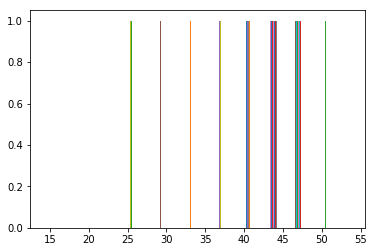

In [14]:
plt.hist(lb)
plt.show()

In [15]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]


In [16]:
col = data.spots_pd["Collection"].unique()

train_test =[ tuple(col),tuple(col)]


In [17]:
cs = data.spots_pd["Collection"].unique()

In [18]:
complete = pd.DataFrame(columns=["Test", "Train"])
import itertools

test = list(itertools.product(*data.collection_in_virbatch().values()))

In [21]:
len(test)/20
35400

35429.4

In [22]:

complete = pd.DataFrame(columns=["Test", "Train"])
import itertools

test = list(itertools.product(*data.collection_in_virbatch().values()))

for i, row in enumerate(test[::35400]):
    complete.set_value(i, "Test", row)
    complete.set_value(i, "Train", tuple(set(cs) - set(row)))



/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [23]:
complete

,Test,Train
0,"(2018_03_21_slide_47, 2018_03_21_slide_35, 201...","(2018_03_21_slide_56, 2018_03_21_slide_45, 201..."
1,"(2018_03_21_slide_47, 2018_03_21_slide_35, 201...","(2018_03_21_slide_30, 2018_03_21_slide_57, 201..."
2,"(2018_03_21_slide_47, 2018_03_21_slide_35, 201...","(2018_03_21_slide_30, 2018_03_21_slide_56, 201..."
3,"(2018_03_21_slide_47, 2018_03_21_slide_36, 201...","(2018_03_21_slide_56, 2018_03_21_slide_45, 201..."
4,"(2018_03_21_slide_47, 2018_03_21_slide_36, 201...","(2018_03_21_slide_45, 2018_03_21_slide_44, 201..."
5,"(2018_03_21_slide_47, 2018_03_21_slide_37, 201...","(2018_03_21_slide_30, 2018_03_21_slide_56, 201..."
6,"(2018_03_21_slide_47, 2018_03_21_slide_37, 201...","(2018_03_21_slide_30, 2018_03_21_slide_56, 201..."
7,"(2018_03_21_slide_48, 2018_03_21_slide_35, 201...","(2018_03_21_slide_45, 2018_03_21_slide_44, 201..."
8,"(2018_03_21_slide_48, 2018_03_21_slide_35, 201...","(2018_03_21_slide_56, 2018_03_21_slide_44, 201..."
9,"(2018_03_21_slide_48, 2018_03_21_slide_36, 201...","(2018_03_21_slide_56, 2018_03_21_slide_45, 201..."


In [25]:
#pbs_len

In [27]:
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py'>

In [28]:
frames = []
#spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pb)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(9).clean()
#data = clean()

for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=complete)
    ana.calculate_all()
    frames.append(ana.complete_information())


*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****Neare

In [29]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")


In [30]:
list_p = list(zip([str(pl) for pl in pbs_len],lb.index))
x_ticks = [','.join(p) for p in list_p]

In [36]:
x = len(frames[1])/3
x*2

4914.0

In [37]:
frames_NN = []
frames_DT = []
frames_LR =[]

for frame in frames:
    first = frame[:2457]
    second =  frame[2457:4914]
    third  =  frame[4914:]
    frames_NN.append(first)
    frames_DT.append(second)
    frames_LR.append(third)


In [544]:
frames_NN = []
frames_DT = []
frames_AB =[]
frames_LR =[]

for frame in frames:
    first = frame[:13000]
    second =  frame[13000:26000]
    third  =  frame[26000:39000]
    forth = frame[39000:]
    frames_NN.append(first)
    frames_DT.append(second)
    frames_AB.append(third)
    frames_LR.append(forth)



    

In [113]:
result = pd.concat(frames_NN, keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")

In [114]:
result["TrueFalse"].value_counts()

1    60925
0    37355
Name: TrueFalse, dtype: int64

In [115]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)


In [116]:
#result_m_mean = result_m.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean().reset_index()



In [117]:
result_mean["Name"] = "Mean" 
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

In [118]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
import seaborn as sns


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


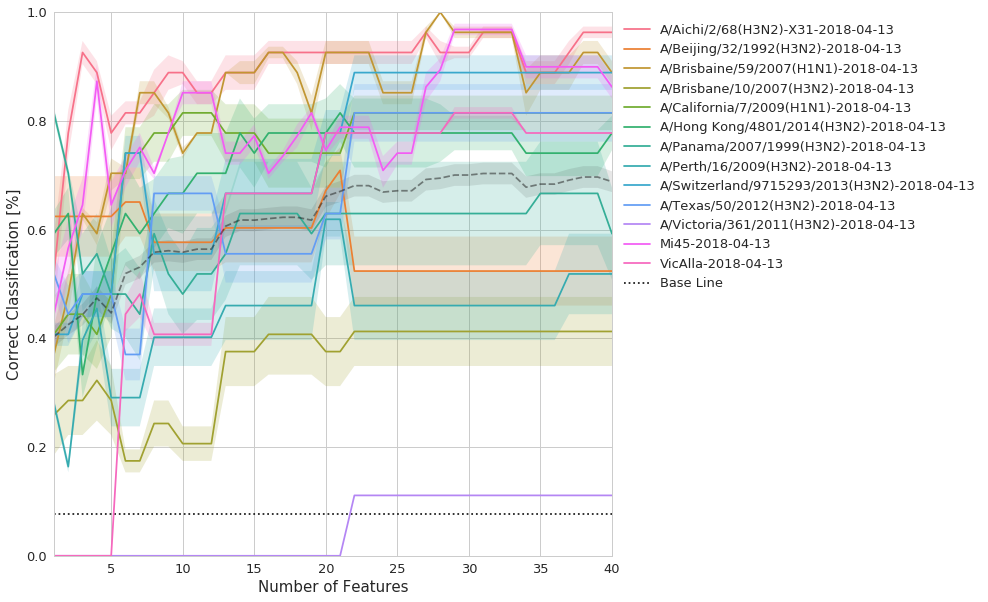

In [140]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True )
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
#ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Analyte Batch", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=False,)

ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
#ax.set(xticks=pbs_len)
#ax.set_xticklabels(x_ticks, rotation=90)

#ax.set_xticks(pbs_len,x_ticks,rotation='vertical')
ax.legend(fontsize=13,bbox_to_anchor=(1.0, 1.00))


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)

plt.yticks(fontsize=13)

plt.show()

In [120]:
top_result = result_mean[result_mean["Peptide Batches"] ==37]

In [121]:
top_result

,Peptide Batches,Analyte Batch,Test,Sample,TrueFalse,Name,unit
9828,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_35, 201...",4.0,1.000000,Mean,0
9829,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_35, 201...",4.0,1.000000,Mean,1
9830,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_35, 201...",4.0,1.000000,Mean,2
9831,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_36, 201...",4.0,1.000000,Mean,3
9832,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_36, 201...",4.0,1.000000,Mean,4
9833,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_37, 201...",4.0,0.777778,Mean,5
9834,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_47, 2018_03_21_slide_37, 201...",4.0,0.777778,Mean,6
9835,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_48, 2018_03_21_slide_35, 201...",4.0,0.777778,Mean,7
9836,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_48, 2018_03_21_slide_35, 201...",4.0,1.000000,Mean,8
9837,37.0,A/Aichi/2/68(H3N2)-X31-2018-04-13,"(2018_03_21_slide_48, 2018_03_21_slide_36, 201...",4.0,1.000000,Mean,9


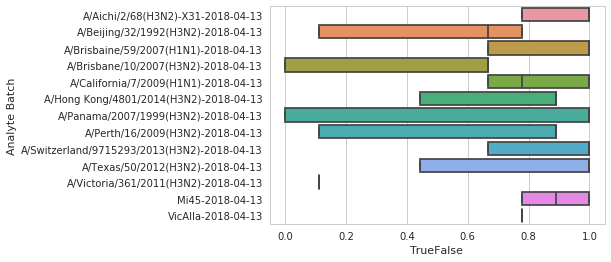

In [126]:
#ax.top_result["TrueFalse"]
ax = sns.boxplot(y="Analyte Batch", x="TrueFalse", data=top_result)


In [123]:
result_m.head()

,Peptide Batches,Analyte Batch,Collection,Majority,ms
0,1,A/Aichi/2/68(H3N2)-X31-2018-04-13,2018_03_21_slide_58,A/Aichi/2/68(H3N2)-X31-2018-04-13,1.0
1,1,A/Aichi/2/68(H3N2)-X31-2018-04-13,2018_03_21_slide_63,A/Aichi/2/68(H3N2)-X31-2018-04-13,1.0
2,1,A/Aichi/2/68(H3N2)-X31-2018-04-13,2018_03_21_slide_64,A/Victoria/361/2011(H3N2)-2018-04-13,0.0
3,1,A/Beijing/32/1992(H3N2)-2018-04-13,2018_03_21_slide_40,A/Beijing/32/1992(H3N2)-2018-04-13,1.0
4,1,A/Beijing/32/1992(H3N2)-2018-04-13,2018_03_21_slide_42,A/Beijing/32/1992(H3N2)-2018-04-13,1.0


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


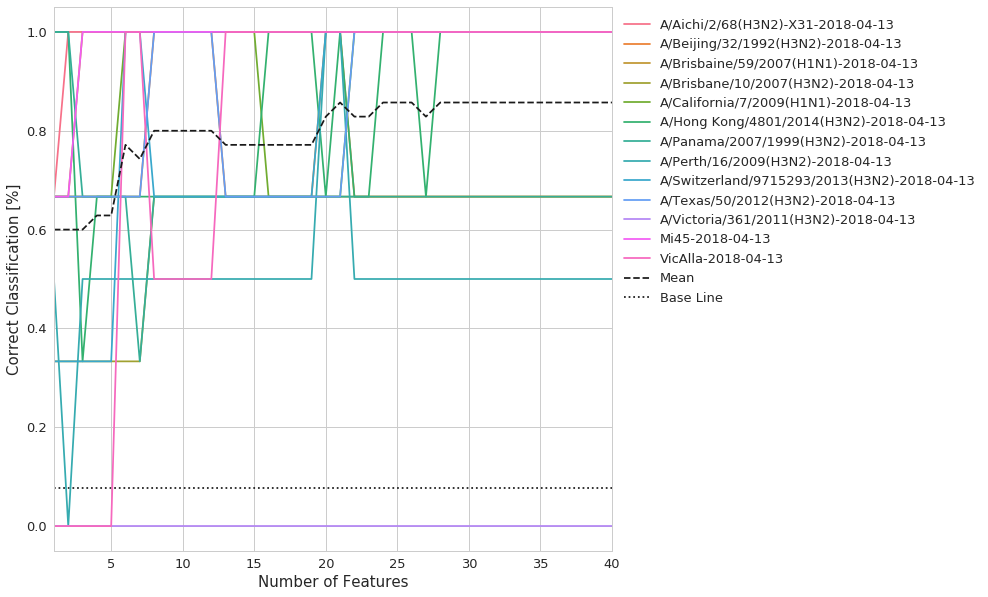

In [134]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
#std_data = result_m.groupby(["Peptide Batches"]).std().reset_index()
#std = std_data["ms"]/np.sqrt(len(std_data["ms"]))
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 


#ax.errorbar(x,y,yerr=std,c="k",linestyle="--", label = "Mean")
ax.plot(x,y,c="k",linestyle="--", label = "Mean")
#ax.set_xlim(1,73 )

#ax.set(xticks=pbs_len)
#ax.set_xticklabels(x_ticks, rotation=90)

plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.hlines(y = 1./len(result_mean["Analyte Batch"].unique()),xmin=0,xmax=len(pbs[:40]),linestyle=":",label="Base Line") 
#plt.legend()
ax.legend(fontsize=13,bbox_to_anchor=(1.0, 1.00))

#ax.set_ylim(0,1.1)
plt.show()

In [478]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [481]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing

2.5.1


In [482]:
reload(a2)


<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py'>

In [483]:
#ligands = ["LF","P132","P102","P125","Nenad","P084",]
#spots_dj =  spots_dj.exclude(raw_spot__lig_fix_batch__ligand__sid__in=ligands)
data = a2.Data(spots_dj=spots_dj)

data = data.outlier_filtering().sample_on_collection(30).clean()


In [541]:
data.x

Ligand Batch                                                         P007  \
Analyte Batch                     Collection          Replica               
A/Aichi/2/68(H3N2)-X31-2018-04-13 2018_03_21_slide_58 0         93.032437   
                                                      1        110.480726   
                                                      2         93.032437   
                                                      3        142.088496   
                                                      4         93.032437   
                                                      5        132.367880   
                                                      6        132.367880   
                                                      7         78.201741   
                                                      8        132.367880   
                                                      9        142.088496   
                                                      10        93.032437   
                                                      11       125.193829   
                                                      12       132.367880   
                                                      13        78.201741   
                                                      14       132.367880   
                                                      15       120.617816   
                                                      16       120.617816   
                                                      17       120.617816   
                                                      18        78.201741   
                                                      19       125.193829   
                                                      20       110.480726   
                                                      21       142.088496   
                                                      22       125.193829   
                                                      23        93.032437   
                                                      24        93.032437   
                                                      25       110.480726   
                                                      26        78.201741   
                                                      27        91.878956   
                                                      28       110.480726   
                                                      29       110.480726   
...                                                                   ...   
VicAlla-2018-04-13                2018_03_21_slide_68 0        220.394780   
                                                      1        162.605550   
                                                      2        152.022585   
                                                      3        290.370310   
                                                      4        166.735726   
                                                      5        162.605550   
                                                      6        220.394780   
                                                      7        290.370310   
                                                      8        162.605550   
                                                      9        166.735726   
                                                      10       189.721044   
                                                      11       263.970636   
                                                      12       238.508703   
                                                      13       220.394780   
                                                      14       263.970636   
                                                      15       220.394780   
                                                      16       162.605550   
                                                      17       263.970636   
                                                      18       162.605550

In [472]:
model_lda = data.x_lda_fit()
test_data = model_lda.transform(data.x)


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



In [473]:
ind = data.x.index.get_level_values("Analyte Batch")
data_ana = pd.DataFrame(data.x.values, index=ind, columns=data.x.columns)
data_test = pd.DataFrame(test_data, index=ind, )

In [474]:
le = preprocessing.LabelEncoder()
le.fit(data.y_names)
cs = le.transform(data.y_names)
colors =cs.astype(float) / cs.max()

def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

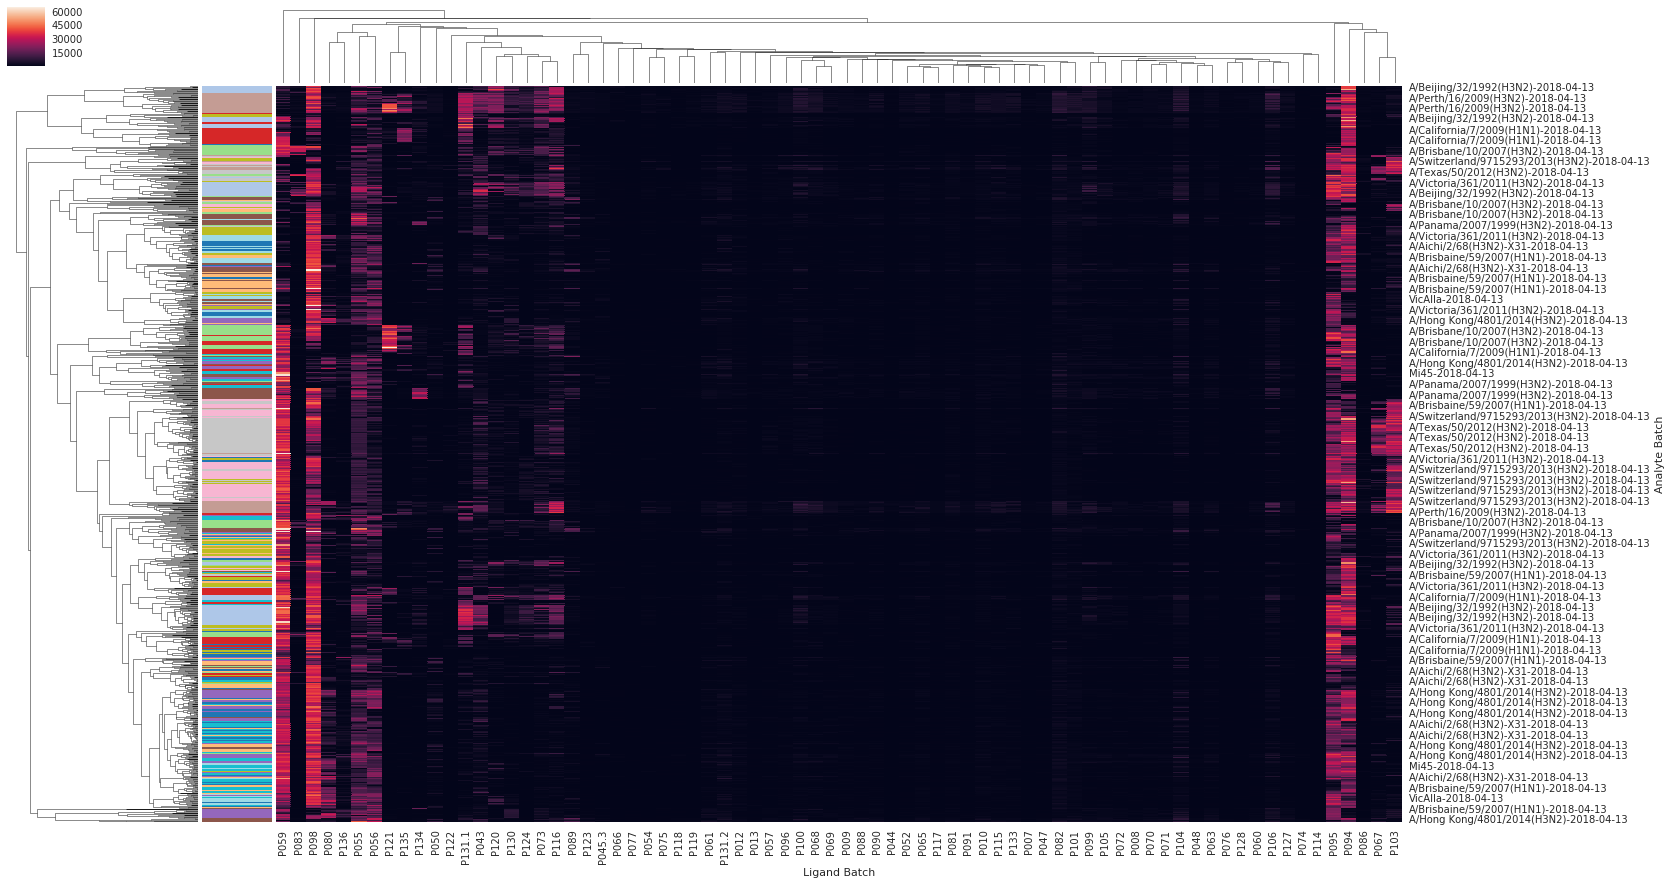

In [475]:
row_colors = get_colors(colors, plt.cm.tab20)

sns.clustermap(data_ana,row_colors=row_colors,metric="correlation", figsize=(25,15))
#sns.clustermap(d_c,figsize=(10,10))#,  metric="correlation")

plt.show()

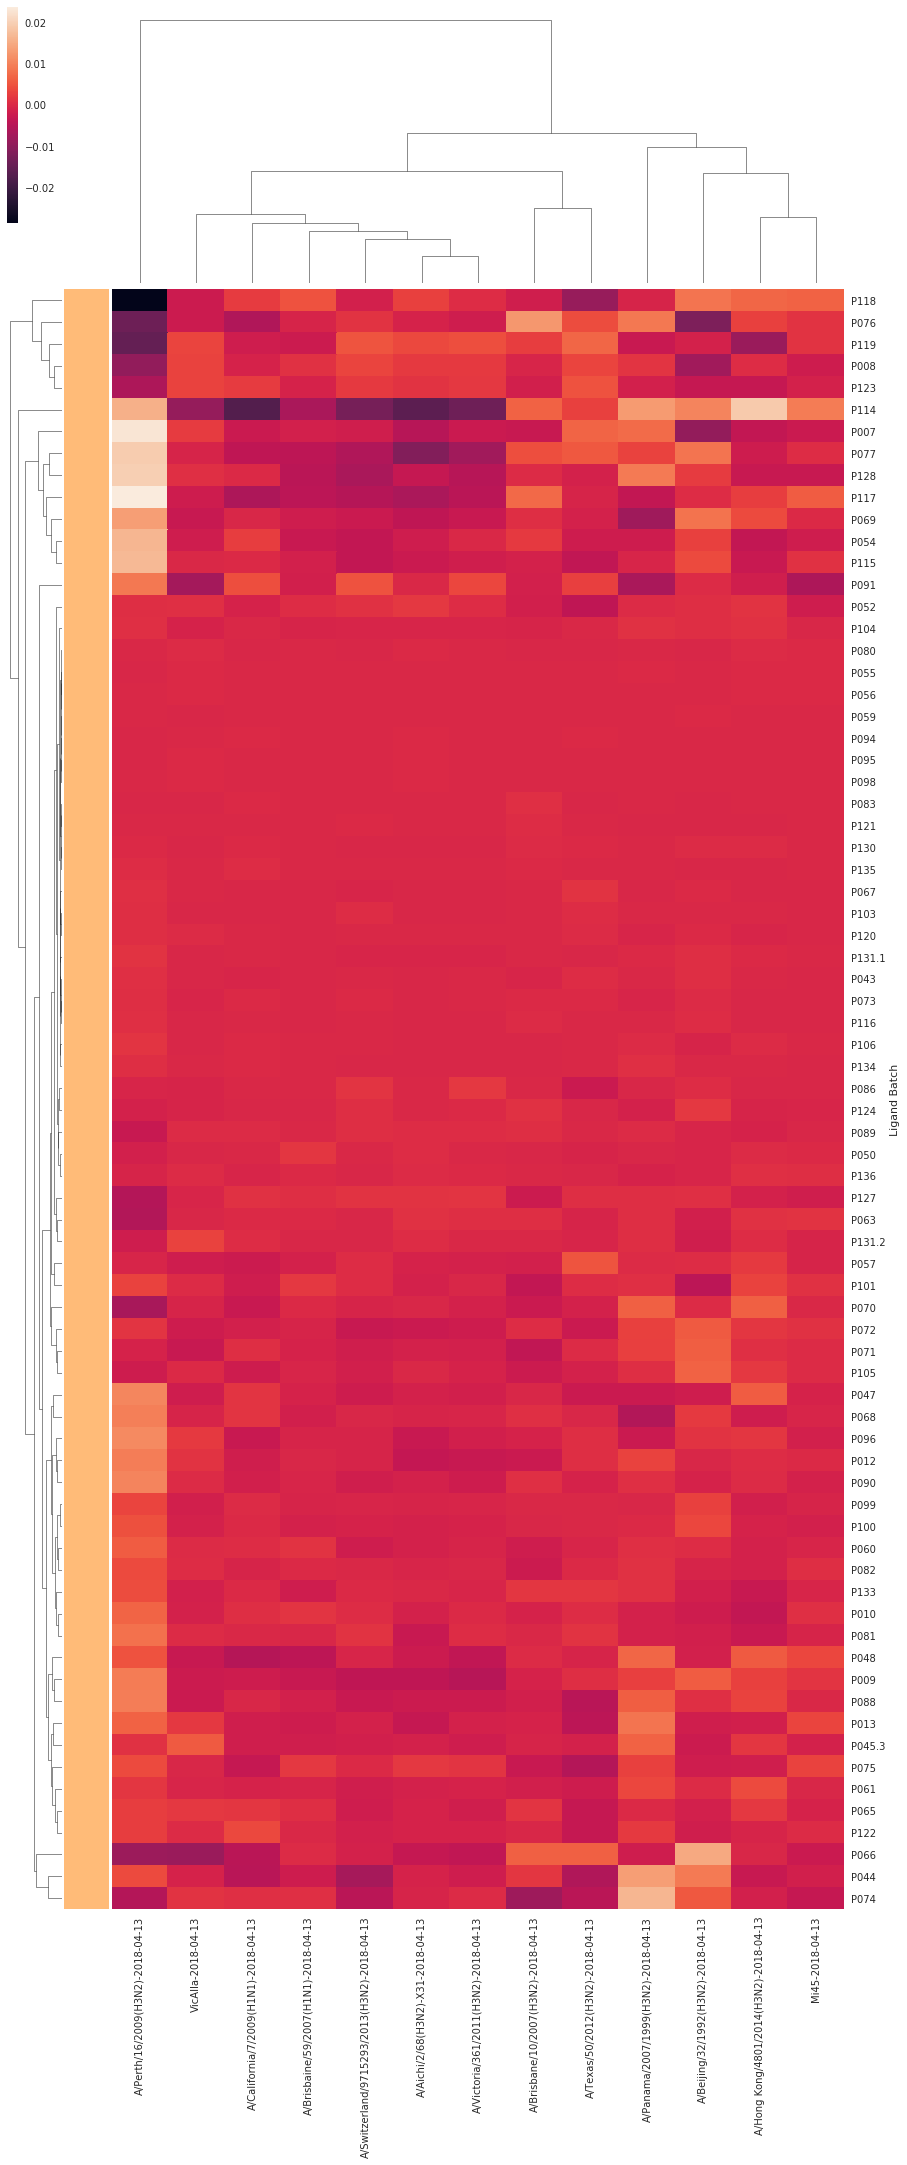

In [476]:
d_c = pd.DataFrame(model_lda.coef_, columns=data.x.columns, index=model_lda.classes_)
#f, ax = plt.subplots(figsize=(20,20))


sns.clustermap(d_c.T,row_colors=row_colors,method="complete",figsize=(15,35))
#sns.clustermap(d_c,figsize=(10,10))#,  metric="correlation")

plt.show()

In [288]:
model_lda.classes_

array(['A/Aichi/2/68(H3N2)-X31-2018-04-13',
       'A/Beijing/32/1992(H3N2)-2018-04-13',
       'A/Brisbaine/59/2007(H1N1)-2018-04-13',
       'A/Brisbane/10/2007(H3N2)-2018-04-13',
       'A/California/7/2009(H1N1)-2018-04-13',
       'A/Hong Kong/4801/2014(H3N2)-2018-04-13',
       'A/Panama/2007/1999(H3N2)-2018-04-13',
       'A/Perth/16/2009(H3N2)-2018-04-13',
       'A/Switzerland/9715293/2013(H3N2)-2018-04-13',
       'A/Texas/50/2012(H3N2)-2018-04-13',
       'A/Victoria/361/2011(H3N2)-2018-04-13', 'Mi45-2018-04-13',
       'VicAlla-2018-04-13'], dtype='<U43')

In [359]:
le = preprocessing.LabelEncoder()
le.fit(data.y_names)
cs = le.transform(data.y_names)
colors =cs.astype(float) / cs.max()

In [477]:


import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    text = data.y_names+"<br>"+data.x.index.get_level_values("Collection"),
    mode='markers',
    hoverinfo='text',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [78]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

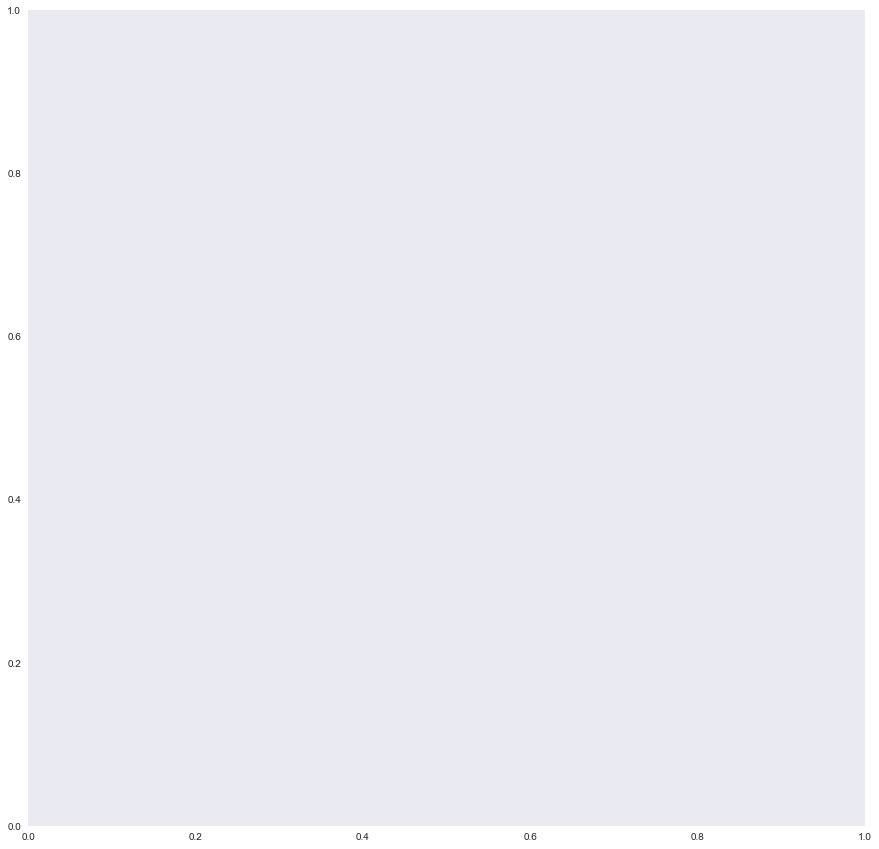

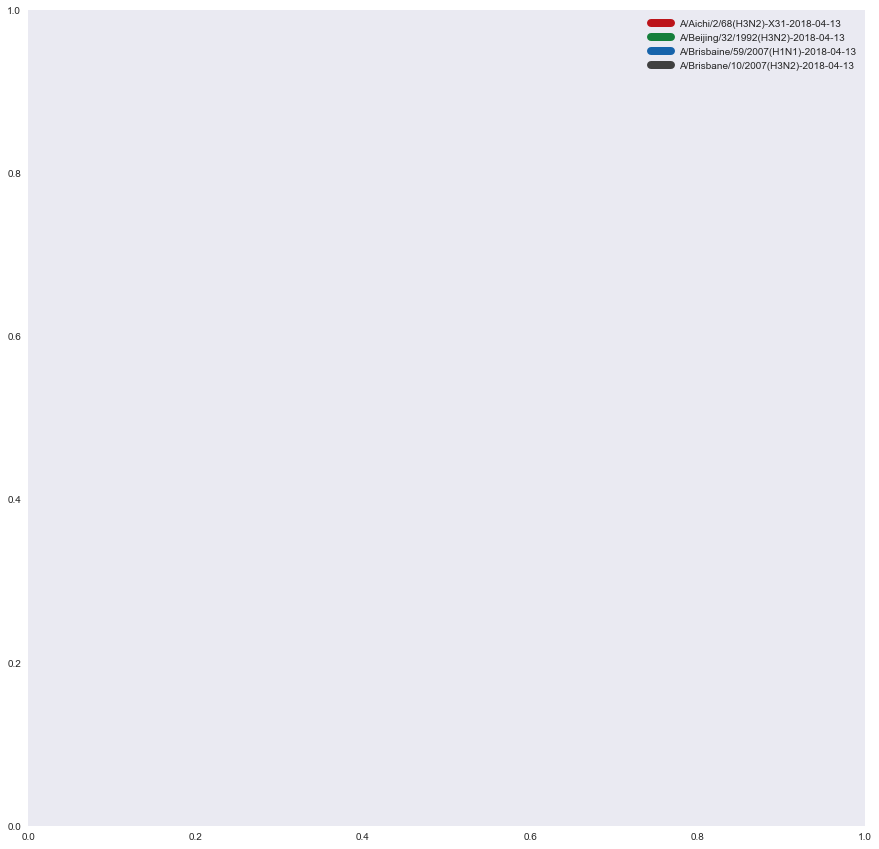

In [79]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

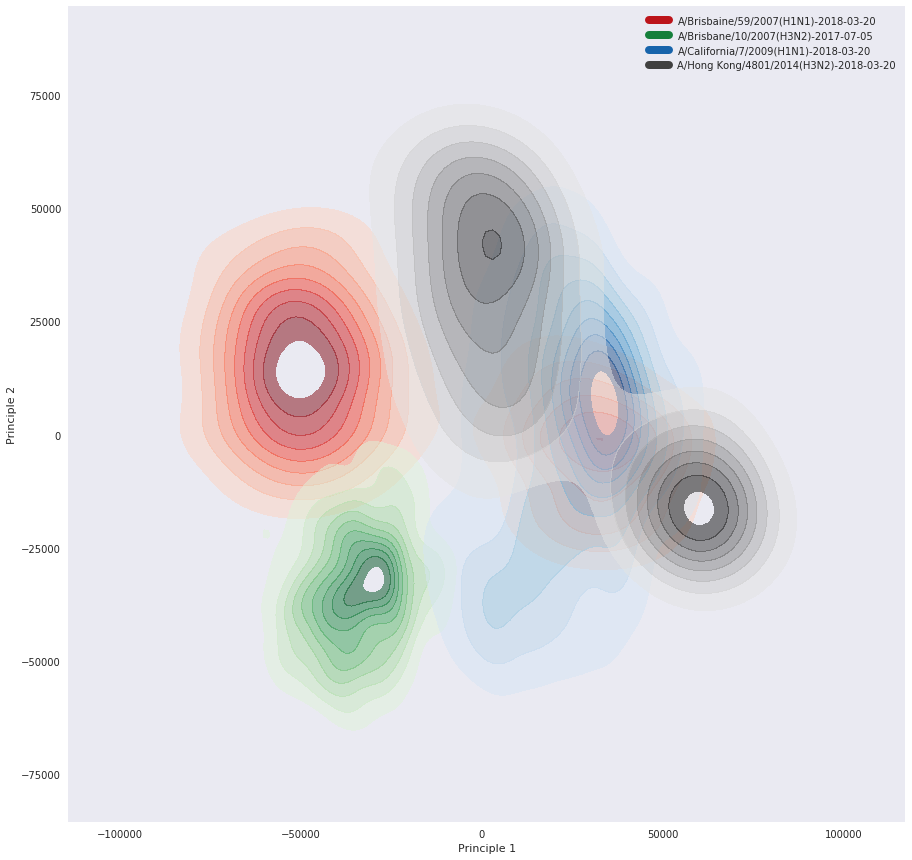

In [652]:
data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,:2],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()